<a href="https://colab.research.google.com/github/MahithaPoduvu/Mahitha_INFO5731_-Spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [2]:
#Count the frequency of all the N-grams (N=3).
import pandas as pd # for dataframes
import numpy as np  # for arrays

import re
import string


from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/twitter_data.csv')
df.head


Mounted at /content/gdrive


<bound method NDFrame.head of     Unnamed: 0                                             tweets
0            0  Since the start of the pandemic, 1,144,461 Ame...
1            1  Masks not required for people staying in outdo...
2            2  Since the start of the pandemic, 1,144,461 Ame...
3            3  We were able to go from original sample to ful...
4            4  Since the start of the pandemic, 1,144,461 Ame...
5            5  @MarahChibwana from Malawi is a medical doctor...
6            6  Day 1123, 26.02.23 at 8AM | India #COVID19 upd...
7            7  #India new #COVID cases crosses 200 after 50da...
8            8  @drayeshaverrall @nzlabour @minhealthnz @chris...
9            9  Since the start of the pandemic, 1,144,461 Ame...
10          10  #Males recovered from mild #COVID19 have basel...>

In [3]:
# for preprocessing data
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
#data.head()
#Lowercase all texts
df['tweets'] = df['tweets'].str.lower()
# remove twitter handles (@user)
df['clean_tweets'] = np.vectorize(remove_pattern)(df['tweets'], "@[\w]*")
# remove special characters, numbers and punctuations
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ")
# remove short words less tha 3 characters long
#df['clean_tweets'] = df['clean_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

<ipython-input-3-24a784d27902>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ")


,Unnamed: 0,tweets,clean_tweets
0,0,"since the start of the pandemic, 1,144,461 ame...",since the start of the pandemic ame...
1,1,masks not required for people staying in outdo...,masks not required for people staying in outdo...
2,2,"since the start of the pandemic, 1,144,461 ame...",since the start of the pandemic ame...
3,3,we were able to go from original sample to ful...,we were able to go from original sample to ful...
4,4,"since the start of the pandemic, 1,144,461 ame...",since the start of the pandemic ame...


In [7]:

#N-grams
import collections
import nltk
from nltk.util import ngrams
from textblob import TextBlob
nltk.download('punkt')
a = (df['clean_tweets'].str.count('people'))
print(a.sum())
trigrams = []
#TextBlob(df['clean_tweets'][0]).ngrams(3)
for tweet in df['clean_tweets'] :
  trigrams += ngrams(tweet.split(), 3)
pd.Series(trigrams).value_counts(normalize=True)

# Probabilities of N grams
bigrams = []
for tweet in df['clean_tweets'] :
  bigrams += ngrams(tweet.split(), 2)
pd.Series(trigrams).value_counts(normalize=True)

for element in bigrams :
  print(element)
  print(bigrams.count(element)/(df['clean_tweets'].str.count(element[1]).sum()))

# Extract all nouns phases
import spacy
nlp = spacy.load("en_core_web_sm")
nounPhrases = []
for tweet in df['clean_tweets'] :
  doc = nlp(tweet)
  nounPhrases += doc.noun_chunks

print(nounPhrases)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5
('since', 'the')
0.2857142857142857
('the', 'start')
0.6666666666666666
('start', 'of')
0.4444444444444444
('of', 'the')
0.2857142857142857
('the', 'pandemic')
0.6666666666666666
('pandemic', 'americans')
1.0
('americans', 'have')
0.8
('have', 'died')
1.0
('died', 'from')
0.25
('from', '#covid')
0.3333333333333333
('#covid', 'of')
0.4444444444444444
('of', 'all')
0.8
('all', 'deaths')
0.6666666666666666
('deaths', 'worldwide')
1.0
('worldwide', 'that')
1.0
('that', 'is')
0.3333333333333333
('is', 'about')
1.0
('about', 'the')
0.2857142857142857
('the', 'same')
1.0
('same', 'as')
0.16666666666666666
('as', 'alaska')
1.0
('alaska', 'airlines')
1.0
('airlines', 'flight')
1.0
('flight', 's')
0.0070921985815602835
('s', 'which')
0.25
('which', 'killed')
1.0
('killed', 'people')
0.8
('people', 'in')
0.12903225806451613
('in', 'https')
0.36363636363636365
('https', 't')
0.07482993197278912
('t', 'co')
0.39285714285714285
('co', 'bdibip')
1.0
('bdibip', 'wt')
1.0
('masks', 'not')
1.0
('not',

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [26]:
# To build the documents-terms weights (tf*idf) matrix bold text.
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/twitter_data.csv')
# Remove punctuation
df['tweets_processed'] = \
df['tweets'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['tweets_processed'] = \
df['tweets_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['tweets_processed'].head()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['tweets_processed']=df['tweets_processed'].apply(remove_stopwords)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['tweets_processed'])
print(vect_text.shape)
print(vect_text)

(11, 185)
  (0, 31)	0.27805658778879133
  (0, 166)	0.10826529925119473
  (0, 92)	0.10826529925119473
  (0, 18)	0.27805658778879133
  (0, 134)	0.1686358487684788
  (0, 7)	0.27805658778879133
  (0, 103)	0.18679490241233915
  (0, 15)	0.27805658778879133
  (0, 81)	0.27805658778879133
  (0, 41)	0.27805658778879133
  (0, 42)	0.27805658778879133
  (0, 4)	0.27805658778879133
  (0, 182)	0.18679490241233915
  (0, 68)	0.15328258767613198
  (0, 13)	0.18679490241233915
  (0, 65)	0.09959904886278628
  (0, 70)	0.18679490241233915
  (0, 43)	0.18679490241233915
  (0, 9)	0.18679490241233915
  (0, 132)	0.15328258767613198
  (0, 160)	0.1686358487684788
  (0, 156)	0.18679490241233915
  (1, 89)	0.2323072890409391
  (1, 87)	0.2323072890409391
  (1, 147)	0.2323072890409391
  :	:
  (9, 68)	0.1595754959715877
  (9, 13)	0.19446363510246772
  (9, 65)	0.10368801741629488
  (9, 70)	0.19446363510246772
  (9, 43)	0.19446363510246772
  (9, 9)	0.19446363510246772
  (9, 132)	0.1595754959715877
  (9, 160)	0.1755590743462

In [46]:
feature_names = vect.get_feature_names_out()
print(feature_names)

['01' '016' '021' '04' '10310' '104494' '11' '111' '1123' '1144461'
 '11798' '13956' '154' '168' '18' '1866s' '1904' '1924' '1971' '1986'
 '200' '21' '2149' '218' '24' '260223' '27' '31790' '36' '50days' '59'
 '5bdibip6wt' '6uxjft67xw' '82' '8am' '8pyh3ohnel' '8zz9fcrqlw' '97'
 'able' 'active' 'air' 'airlines' 'alaska' 'americans' 'amp' 'areas'
 'avoided' 'babbs' 'backlogs' 'baseline' 'bd' 'biomedicalscience' 'body'
 'brain' 'capacity' 'career' 'careers' 'cases' 'cerritos' 'challenges'
 'chrishipkins' 'city' 'clinicianscientist' 'collisions' 'covid' 'covid19'
 'crosses' 'day' 'deaths' 'developed' 'died' 'doctor' 'drayeshaverrall'
 'dropped' 'eden' 'episode' 'euud35yrff' 'exhaustion' 'explore' 'february'
 'fires' 'flight' 'fog' 'full' 'future' 'genome' 'go' 'govt' 'gxiobrim5x'
 'hn2ztorzvt' 'home' 'hours' 'https' 'immune' 'immunology' 'ims' 'india'
 'insights' 'interest' 'ircytgbyh6' 'iuuz9jlsnc' 'jhuapl' 'junior'
 'killed' 'kl' 'longcovid' 'lt' 'macao' 'malawi' 'males' 'manage'
 'manda

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(vect_text, vect_text)
print(cosine_sim)

[[1.         0.05163255 0.39713751 0.03832631 0.34369374 0.04490598
  0.04597992 0.03016264 0.02660784 0.39713751 0.03341607]
 [0.05163255 1.         0.05375228 0.0187886  0.04651871 0.02201414
  0.02717483 0.01478655 0.03848621 0.05375228 0.02791805]
 [0.39713751 0.05375228 1.         0.03989977 0.35780384 0.04674957
  0.04786759 0.03140094 0.0277002  0.41344171 0.03478794]
 [0.03832631 0.0187886  0.03989977 1.         0.03453036 0.03026966
  0.02192505 0.01193    0.03105123 0.03989977 0.02252469]
 [0.34369374 0.04651871 0.35780384 0.03453036 1.         0.04045836
  0.04142593 0.02717524 0.02397252 0.35780384 0.03010645]
 [0.04490598 0.02201414 0.04674957 0.03026966 0.04045836 1.
  0.02568904 0.01397808 0.00543468 0.04674957 0.02639161]
 [0.04597992 0.02717483 0.04786759 0.02192505 0.04142593 0.02568904
  1.         0.43619757 0.00394013 0.04786759 0.06497511]
 [0.03016264 0.01478655 0.03140094 0.01193    0.02717524 0.01397808
  0.43619757 1.         0.08679756 0.03140094 0.0777554 ]


In [ ]:
#To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.
import pandas as pd
new_tweet = pd.Series(["An Outstanding movie with a haunting performance and best character development"])
Corpus = df['tweets_processed'].append(new_tweet, ignore_index = True)
print(Corpus)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
x = vect.fit_transform(Corpus)
cosine_sim = cosine_similarity(x,x)
print(cosine_sim)



# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [75]:
#Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
# I have done word2vec word embedding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#  to load data
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/article_data.csv')
df.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,article_abstracts,cleaned_abstracts
0,0,QIIME 2 development was primarily funded by NS...,qiime development primarily funded nsf award j...
1,1,"© 2018, Cambridge University Press Let us summ...",cambridge university press let u summarize fin...
2,2,CRISP-DM(CRoss-Industry Standard Process for D...,crispdmcrossindustry standard process data min...
3,3,"The digital world has a wealth of data, such a...",the digital world wealth data internet thing i...
4,4,Data science (DS) projects often follow a life...,data science d project often follow lifecycle ...


In [76]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['clean_text'] = df['cleaned_abstracts'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,article_abstracts,cleaned_abstracts,clean_text
0,0,QIIME 2 development was primarily funded by NS...,qiime development primarily funded nsf award j...,qiime development primarily funded nsf award j...
1,1,"© 2018, Cambridge University Press Let us summ...",cambridge university press let u summarize fin...,cambridge university press let u summarize fin...
2,2,CRISP-DM(CRoss-Industry Standard Process for D...,crispdmcrossindustry standard process data min...,crispdmcrossindustry standard process data min...
3,3,"The digital world has a wealth of data, such a...",the digital world wealth data internet thing i...,digital world wealth data internet thing iot d...
4,4,Data science (DS) projects often follow a life...,data science d project often follow lifecycle ...,data science project often follow lifecycle co...


In [82]:
!pip install gensim
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.5 MB/s eta 0:00:00


In [89]:
import gensim
review_text = df.clean_text.apply(gensim.utils.simple_preprocess)
review_text
review_text.loc[0]
df.clean_text.loc[0]

'qiime development primarily funded nsf award jgc rk partial support also provided following grant nih uca jgc tp umd jgc tp grant alfred p sloan foundation jgc rk ercstg project metapg n strategic priority research program chinese academy science qyzdbsswsmc yb australian national health medical research council app gah jgc von bing yap rk natural science engineering research council nserc dlg state arizona technology research initiative fund trif administered arizona board regent northern arizona university nci coauthor supported intramural research program national cancer institute smg c diener supported washington research foundation distinguished investigator award'

In [93]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)
model.build_vocab(review_text, progress_per=1000)
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(1001, 4105)

In [95]:
model.wv.most_similar("council")

[('exploratory', 0.28073781728744507),
 ('system', 0.24157355725765228),
 ('component', 0.22407430410385132),
 ('many', 0.21916289627552032),
 ('autods', 0.21373067796230316),
 ('advanced', 0.20574161410331726),
 ('summarize', 0.195221409201622),
 ('insight', 0.19041866064071655),
 ('machine', 0.17593815922737122),
 ('mathematical', 0.16391173005104065)]

In [98]:
model.wv.similarity(w1="support", w2="grant")

-0.030320514

['data', 'science', 'project', 'application', 'research', 'autods', 'model', 'ot', 'problem', 'jgc', 'user', 'advanced', 'task', 'researcher', 'machine', 'smart', 'system', 'insight', 'useful', 'used', 'optimal', 'transport', 'challenge', 'theory', 'paper', 'computer', 'knowledge', 'view', 'computing', 'learning', 'rk', 'method', 'support', 'analytics', 'arizona', 'supported', 'process', 'domain', 'mining', 'various', 'become', 'many', 'still', 'field', 'revolution', 'group', 'important', 'exploratory', 'year', 'present', 'change', 'including', 'interface', 'technique', 'singlecell', 'automation', 'theoretical', 'computational', 'reader', 'mathematical', 'making', 'discrete', 'summarize', 'finding', 'standard', 'thus', 'university', 'overview', 'review', 'monograph', 'emergence', 'term', 'measure', 'student', 'technology', 'sequencing', 'emphasis', 'central', 'also', 'grant', 'tp', 'foundation', 'component', 'goaldirected', 'program', 'understanding', 'national', 'health', 'council', '

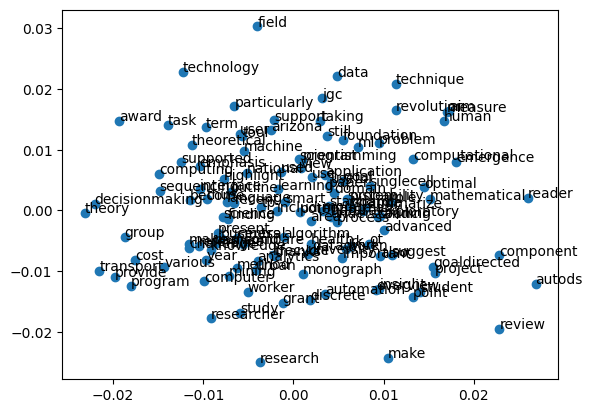

In [117]:
 #Visualize the word embedding model you created.
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model_vocab = list(model.wv.index_to_key)
print(model_vocab)

pca = PCA(n_components=2)

my_pca = pca.fit_transform(model.wv[model_vocab])

plt.scatter(my_pca[:,0], my_pca[:,1])

for i, word in enumerate(model_vocab):
    plt.annotate(word, xy=(my_pca[i,0], my_pca[i,1]))

plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 





In [123]:
#Importing libaries
import warnings
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
%matplotlib inline
warnings.filterwarnings('ignore')

# for preprocessing data
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
#data.head()
#Lowercase all texts
data['tweets'] = data['tweets'].str.lower()
data.head
# remove twitter handles (@user)
data['clean_tweets'] = np.vectorize(remove_pattern)(data['tweets'], "@[\w]*")
#data.head
# remove special characters, numbers and punctuations
data['clean_tweets'] = data['clean_tweets'].str.replace("[^a-zA-Z#]", " ")
#data.head()
# remove short words less tha 3 characters long
data['clean_tweets'] = data['clean_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,Unnamed: 0,tweets,clean_tweets
0,0,"since the start of the pandemic, 1,144,461 ame...",since start pandemic americans have died from ...
1,1,masks not required for people staying in outdo...,masks required people staying outdoor areas #m...
2,2,"since the start of the pandemic, 1,144,461 ame...",since start pandemic americans have died from ...
3,3,we were able to go from original sample to ful...,were able from original sample full genome seq...
4,4,"since the start of the pandemic, 1,144,461 ame...",since start pandemic americans have died from ...


In [128]:
df = pd.DataFrame(twitter_data,columns=['tweets','clean tweets'])
print(df)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')